In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os



os.environ['KAGGLE_USERNAME']="sanjeevns"
os.environ['KAGGLE_KEY']="05fc219abf6e7cb2bfc68e38304e9673"



!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.91G/1.91G [00:17<00:00, 151MB/s]
100% 1.91G/1.91G [00:17<00:00, 116MB/s]


In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
import gdown

!gdown --fuzzy 'https://drive.google.com/file/d/1GfquRD-5pBuiIirFcuJzaoGQxQbBo1zg/view?usp=share_link'

Downloading...
From: https://drive.google.com/uc?id=1GfquRD-5pBuiIirFcuJzaoGQxQbBo1zg
To: /content/query.zip
100% 1.08M/1.08M [00:00<00:00, 76.8MB/s]


In [ ]:
!unzip '/content/query.zip'

Archive:  /content/query.zip
   creating: query/
  inflating: query/001.jpg           
  inflating: query/006.jpg           
  inflating: query/011.jpg           
  inflating: query/014.jpg           
  inflating: query/AB (12).jpg       
  inflating: query/AB (13).jpg       
  inflating: query/AB (15).jpg       
  inflating: query/AB1 (17).jpg      
  inflating: query/AB1 (20).jpg      
  inflating: query/AB1 (24).jpg      
  inflating: query/AB1 (26).jpg      
  inflating: query/AB1 (33).jpg      
  inflating: query/AB1 (34).jpg      
  inflating: query/AC (11).jpg       
  inflating: query/AC (7).jpg        
  inflating: query/AC (9).jpg        
  inflating: query/ACC (24).jpg      
  inflating: query/ACC (25).jpg      
  inflating: query/ACC (28).jpg      
  inflating: query/ACC (29).jpg      
  inflating: query/ACC (6).jpg       
  inflating: query/ACC (7).jpg       
  inflating: query/AEC (10).jpg      
  inflating: query/AEC (11).jpg      
  inflating: query/AEC (12).jpg      
 

In [ ]:
!unzip '/content/100-bird-species.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/WHITE NECKED RAVEN/028.jpg  
  inflating: train/WHITE NECKED RAVEN/029.jpg  
  inflating: train/WHITE NECKED RAVEN/030.jpg  
  inflating: train/WHITE NECKED RAVEN/031.jpg  
  inflating: train/WHITE NECKED RAVEN/032.jpg  
  inflating: train/WHITE NECKED RAVEN/033.jpg  
  inflating: train/WHITE NECKED RAVEN/034.jpg  
  inflating: train/WHITE NECKED RAVEN/035.jpg  
  inflating: train/WHITE NECKED RAVEN/036.jpg  
  inflating: train/WHITE NECKED RAVEN/037.jpg  
  inflating: train/WHITE NECKED RAVEN/038.jpg  
  inflating: train/WHITE NECKED RAVEN/039.jpg  
  inflating: train/WHITE NECKED RAVEN/040.jpg  
  inflating: train/WHITE NECKED RAVEN/041.jpg  
  inflating: train/WHITE NECKED RAVEN/042.jpg  
  inflating: train/WHITE NECKED RAVEN/043.jpg  
  inflating: train/WHITE NECKED RAVEN/044.jpg  
  inflating: train/WHITE NECKED RAVEN/045.jpg  
  inflating: train/WHITE NECKED RAVEN/046.jpg  
  inflating: train/WHITE NECKED RAVEN

In [ ]:
# Set path to images folder
img_dir = '/content/train'


In [ ]:
# Load VGG19 model
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Get list of image file names
img_files = []
for root, dirs, files in os.walk(img_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png') :
            img_files.append(os.path.join(root, file))


In [ ]:
# Preprocess images and extract features using VGG19
features = []
for img_file in img_files:
    img = load_img(img_file, target_size=(224, 224))
    img_arr = img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr = preprocess_input(img_arr)
    feature = vgg19_model.predict(img_arr)
    features.append(feature.flatten())

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 614ms/step


In [ ]:
# Convert features to numpy array
features = np.array(features)

In [ ]:
# Fit k-nearest neighbors model
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_model.fit(features)


NearestNeighbors(metric='cosine')

In [ ]:
# Get query image
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
  print('Uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))

  file_path = "/content/" + filename


In [ ]:
# Query image
query_img_path = file_path
query_img = load_img(query_img_path, target_size=(224, 224))
query_img_arr = img_to_array(query_img)
query_img_arr = np.expand_dims(query_img_arr, axis=0)
query_img_arr = preprocess_input(query_img_arr)


In [ ]:
# Extract features from query image using VGG19
query_feature = vgg19_model.predict(query_img_arr)
query_feature = query_feature.flatten()


In [ ]:
# Find similar images
distances, indices = knn_model.kneighbors(query_feature.reshape(1, -1))

In [ ]:
for i in range(5):
  print(distances[i],indices[i])

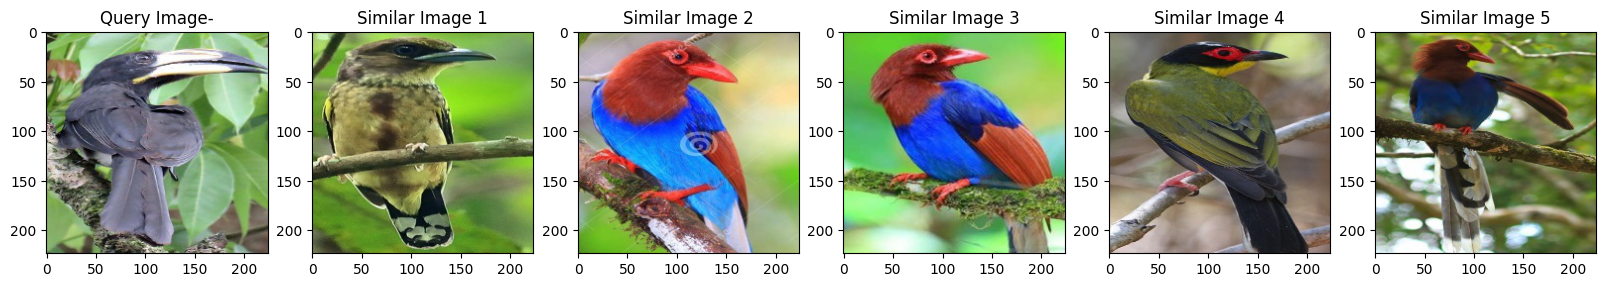

In [ ]:
# Plot similar images
fig, axs = plt.subplots(1, 6, figsize=(20, 20))
axs[0].imshow(query_img)
axs[0].set_title('Query Image')
for i in range(5):
    img_file = img_files[indices[0][i]]
    img = load_img(img_file, target_size=(224, 224))
    axs[i+1].imshow(img)
    axs[i+1].set_title(f'Similar Image {i+1}')
plt.show()


In [ ]:
# Get list of image file names and corresponding labels
img_files = []
labels = []
for root, dirs, files in os.walk(img_dir):
    for file in files:
        if file.endswith('.jpg'):
            img_files.append(os.path.join(root, file))
            labels.append(root.split('/')[-1])